In [186]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

#FE
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2

#modeling
from sklearn.model_selection import StratifiedShuffleSplit

#Transformers
from sklearn.base import BaseEstimator, TransformerMixin

#pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#handlemissing value
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
#handle outlier
from feature_engine.outliers import Winsorizer

#model 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

#evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

#fine tuning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max.columns", None)

Pengantar :
Penyakit kardiovaskular (CVDs) adalah penyebab kematian nomor 1 secara global, mengambil sekitar 17,9 juta jiwa setiap tahun, yang menyumbang 31% dari semua kematian di seluruh dunia.
Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

columns : 
1. age : umur pasien
2. anaemia : penuruanan sel darah merah atau hemoglobin
3. creatinine_phosphokinase : Tingkat ezim CPK dalam darah (mcb/L)
4. diabetes : jika pasien menderita diabetes (bool)
5. ejection_fraction : Persentase darah yang meninggalkan jantung pada setiap kontraksi (persentase)
6. high_blood_pressure : jika paseien hipertensi(bool)
7. platelets : Trombosit dalam darah (kiloplatelet/mL)
8. serum_creatinine : Kadar kreatinin serum dalam darah(mg/dL)
9. serum_sodium : kadar natrium serum dalahmdarah(mEq/L)
10. sex : wanita atau pria(biner)
11. smoking : jika pasiem merokok atau tidak(bool)
12. time : preiode ditangani(days)
13. DEATH_EVENT : jika pasien minggal selama masa tindak lanjut(bool), 1 DEATH, 0 ALIVE

# EDA

In [4]:
#change flot to int
df['age'] = df['age'].astype(int)

In [5]:
#chech_missing values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
df['DEATH_EVENT'].unique()

array([1, 0])

In [7]:
#group dead = 1 and dead = 0
dead_1 = df[df['DEATH_EVENT'] == 1]
dead_0 = df[df['DEATH_EVENT'] == 0]

In [8]:
dead_1.shape

(96, 13)

In [9]:
dead_0.shape

(203, 13)

In [10]:
#funct group
def group(df, col):
    return df.groupby(col).size().to_frame('count').reset_index()

In [11]:
#age
age_0 = group(dead_0, 'age')
age_1 = group(dead_1,'age')

#anemia
anaemia_0 = group(dead_0, 'anaemia')
anaemia_1 = group(dead_1, 'anaemia')

#creatinine_phosphokinase
creatinine_0 = group(dead_0, 'creatinine_phosphokinase')
creatinine_1 = group(dead_1, 'creatinine_phosphokinase')

#diabetes
diabetes_0 = group(dead_0, 'diabetes')
diabetes_1 = group(dead_1, 'diabetes')

#ejection_fraction
ejection_0 = group(dead_0, 'ejection_fraction')
ejection_1 = group(dead_1, 'ejection_fraction')

#high_blood_pressure
blood_0 = group(dead_0, 'high_blood_pressure')
blood_1 = group(dead_1, 'high_blood_pressure')

#platelets
platelets_0 = group(dead_0,'platelets')
platelets_1 = group(dead_1, 'platelets')

#serum
serum_0 = group(dead_0, 'serum_sodium')
serum_1 = group(dead_1, 'serum_sodium')

#sex
sex_0 = group(dead_0, 'sex')
sex_1 = group(dead_1, 'sex')

#smoking
smoking_0 = group(dead_0, 'smoking')
smoking_1 = group(dead_1, 'smoking')

#time
time_0 = group(dead_0, 'time')
time_1 = group(dead_1, 'time')

In [27]:
time_0

,time,count
0,12,1
1,16,1
2,22,1
3,29,1
4,30,1
...,...,...
92,270,2
93,271,1
94,278,1
95,280,1


In [25]:
def plot(df_age, df_anaemia,df_ejection, df_diabetes,df_sex, df_smoking ,label):
    fig = make_subplots(
        rows=3, cols= 2,
        specs = [
                [{'type' : 'bar'}, {'type' : 'pie'}],
                [{'type' : 'bar'}, {'type' : 'pie'}],
                [{'type' : 'pie'} , {'type' : 'pie'}]
        ],
        
        subplot_titles=('age', 'Anaemia', 'ejection_fraction', 'Diabetes', 'sex', 'smoking')
    )
    #age
    fig.add_trace(go.Bar(x=list(df_age['age']), y=list(df_age['count']),
                        marker=dict(color=list(df_age['count']))),
                1, 1)
    #Anaemia
    fig.add_trace(go.Pie(labels = df_anaemia['anaemia'], values=df_anaemia['count']),
                1,2)
    
    #creatinine
    fig.add_trace(go.Bar(x=list(df_ejection['ejection_fraction']), y=list(df_ejection['count']),
                        marker=dict(color=list(df_ejection['count']))),
                2, 1)
    #Diabetes
    fig.add_trace(go.Pie(labels = df_diabetes['diabetes'], values=df_diabetes['count']),
                2,2)
    
    #sex
    fig.add_trace(go.Pie(labels = df_sex['sex'], values= df_sex['count']),
                3,1)
    #smoking
    fig.add_trace(go.Pie(labels = df_smoking['smoking'], values= df_smoking['count']),
                3,2)
    
    fig.update_layout(height = 700,showlegend = False, title_text =  label)
    fig.show()



In [111]:
%matplotlib inline 
plot(age_0, anaemia_0, ejection_0, diabetes_0,sex_0, smoking_0, "Dead 0")

In [110]:
%matplotlib inline 
plot(age_1, anaemia_1 ,ejection_1, diabetes_1 ,sex_1, smoking_1, "Dead 1")

In [32]:
df[df['DEATH_EVENT'] == 0].shape[0]

203

In [33]:
df[df['DEATH_EVENT'] == 1].shape[0]

96

In [36]:
label = {'col' : [df[df['DEATH_EVENT'] == 0].shape[0], df[df['DEATH_EVENT'] == 1].shape[0]]}
label_df = pd.DataFrame(label)
label_df

,col
0,203
1,96


In [109]:
%matplotlib inline 
fig = px.histogram(label_df, x=label_df.index, y='col', color = 'col')
fig.show()

dapat dilihat data tersebut memiliki label yang imbalance dengan 0 memiliki nilai 203, dan 1 dengan nilai 96

In [37]:
label_df.index

RangeIndex(start=0, stop=2, step=1)

[]

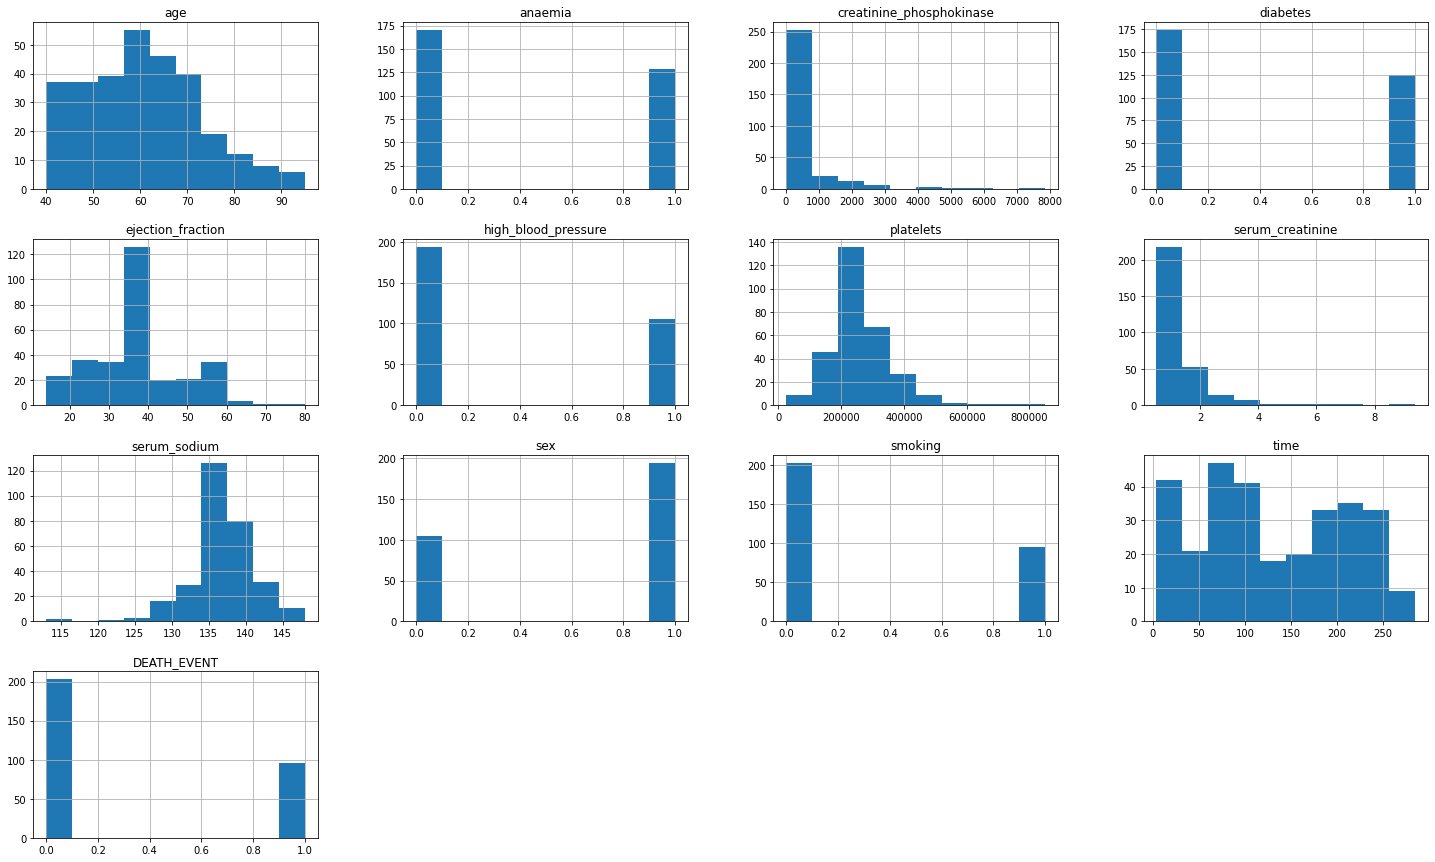

In [108]:
%matplotlib inline 
df.hist(figsize=(25, 15))
plt.plot()

semua columns tidak ada yang memiliki penyerbaran yang normal


In [47]:
# varian
def varian(col):
    return df[col].unique()

In [51]:
list_col = list(df.columns)
for var in range(len(list_col)):
    print(f'{var}. {list_col[var]} : {varian(list_col[var])}\n')

0. age : [75 55 65 50 90 60 80 62 45 49 82 87 70 48 68 53 95 58 94 85 69 72 51 57
 42 41 67 79 59 44 63 86 66 43 46 61 81 52 64 40 73 77 78 54 47 56]

1. anaemia : [0 1]

2. creatinine_phosphokinase : [ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  719  193 4540  646  281 1548  805  291  482  943  185
  132 1610 2261  233   30 1846  335   58  910   72  130 2334 2442  776
  196  835 3966  171  198   95 1419  478  176  395   99  145  104 1896
  151  244   62  121  418  167 1211 1767  308   97   64  101  212 2281
  972  131  135 12

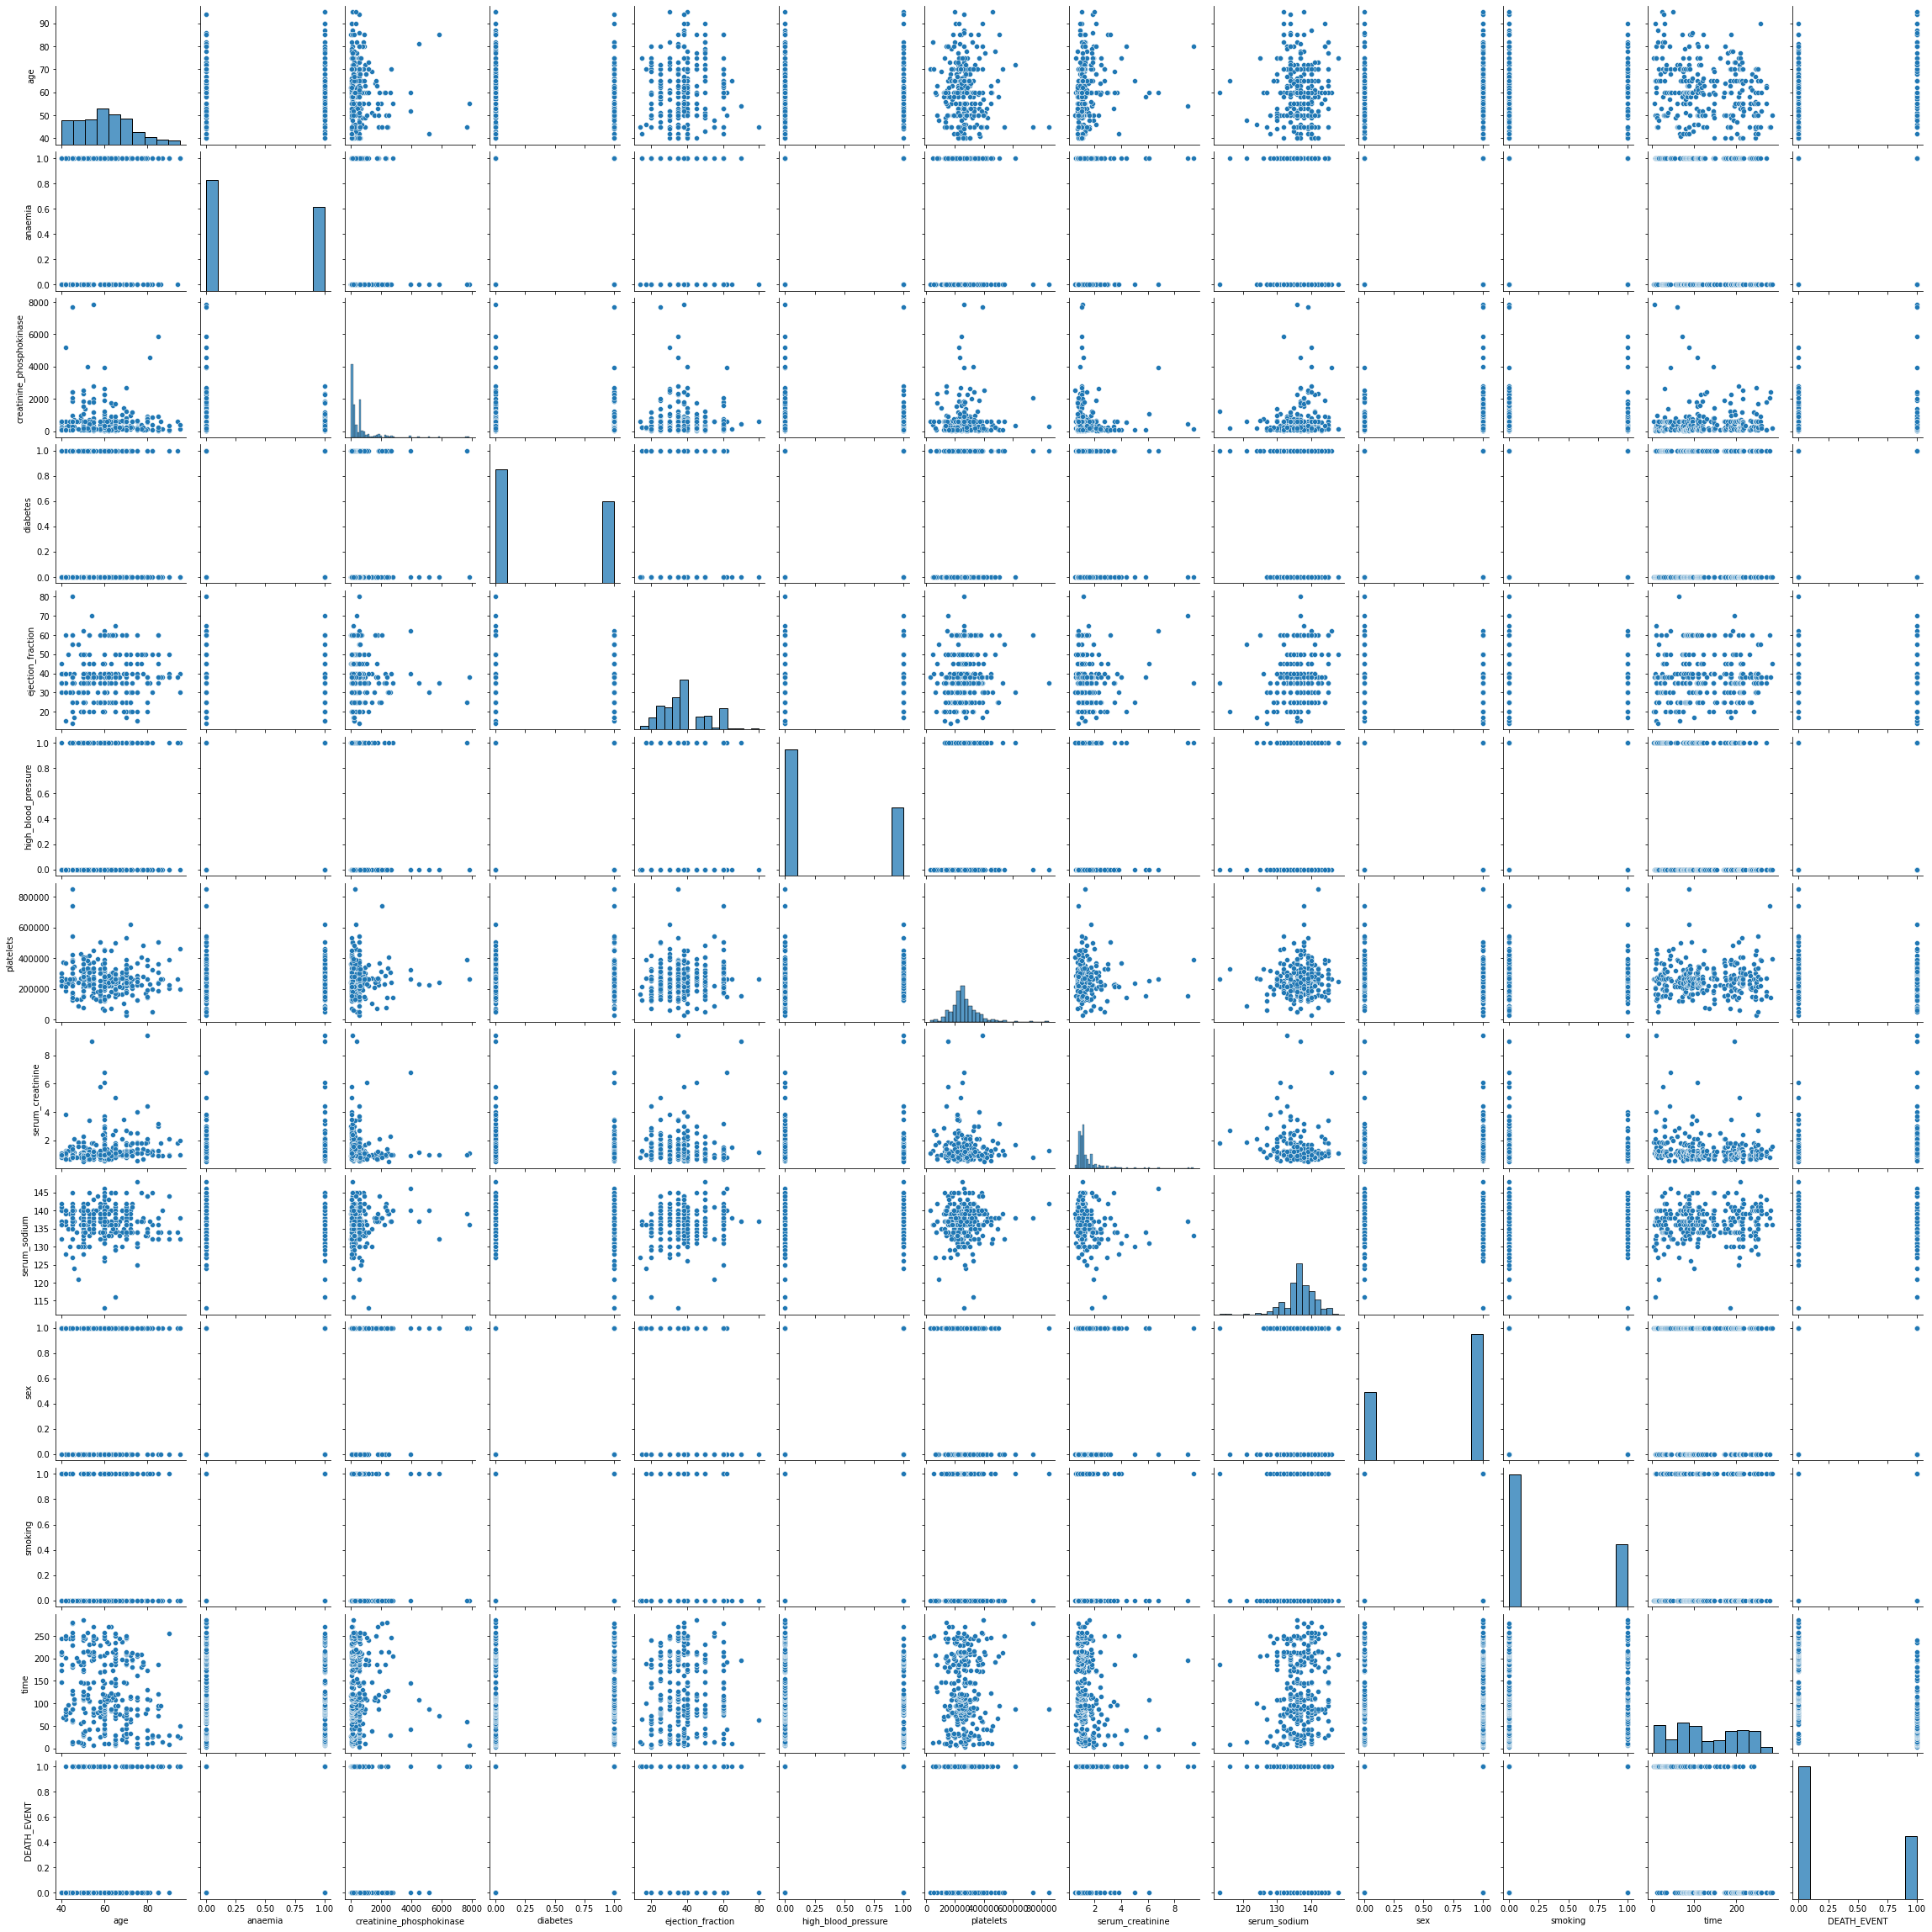

In [112]:
%matplotlib inline 
sns.pairplot(df)

# Modeling

In [136]:
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=1)
for train_index, test_index in split.split(df, df['DEATH_EVENT']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [55]:
strat_train_set.shape

(239, 13)

In [56]:
strat_test_set.shape

(60, 13)

In [57]:
CVD_label = strat_train_set['DEATH_EVENT'].copy()
CVD = strat_train_set.drop('DEATH_EVENT', axis=1)

In [58]:
CVD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 259 to 161
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       239 non-null    int64  
 1   anaemia                   239 non-null    int64  
 2   creatinine_phosphokinase  239 non-null    int64  
 3   diabetes                  239 non-null    int64  
 4   ejection_fraction         239 non-null    int64  
 5   high_blood_pressure       239 non-null    int64  
 6   platelets                 239 non-null    float64
 7   serum_creatinine          239 non-null    float64
 8   serum_sodium              239 non-null    int64  
 9   sex                       239 non-null    int64  
 10  smoking                   239 non-null    int64  
 11  time                      239 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 24.3 KB


## FE

### Feature Selection

In [77]:
CVD_categorical = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
CVD_num = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

In [75]:
clf = DecisionTreeClassifier()

clf.fit(CVD[CVD_num], CVD_label)

list_score_select = list(clf.feature_importances_)
list_column = list(CVD[CVD_num].columns)

dict_score = {'feature':list_column, 'score':list_score_select}

score_num_df = pd.DataFrame(dict_score)
score_num_df.sort_values(by='score', ascending=False)

,feature,score
6,time,0.487576
4,serum_creatinine,0.124855
5,serum_sodium,0.091144
1,creatinine_phosphokinase,0.089020
0,age,0.080112
2,ejection_fraction,0.074870
3,platelets,0.052424


In [80]:
CVD_cat = CVD[CVD_categorical]

In [81]:
#feature selection
fs = SelectKBest(score_func = chi2, k='all')
fs.fit(CVD_cat, CVD_label)


cols = fs.get_support(indices=True)
list_column_categoric = (CVD_cat.iloc[:,cols].columns)
list_score_select_cat = [fs.scores_[val] for val in range(len(fs.scores_))]

dict_score_cat = {'feature':list_column_categoric, 'score':list_score_select_cat}

score_cat_df = pd.DataFrame(dict_score_cat)


score_cat_df.sort_values(by='score', ascending=False)

,feature,score
1,diabetes,0.669572
0,anaemia,0.655135
2,high_blood_pressure,0.204586
3,sex,0.053706
4,smoking,0.019955


In [83]:
class selectionFiture(BaseEstimator, TransformerMixin):
    list_drop = ['smoking']
    def __init__(self, drop_columns = list_drop):
        self.drop_columns = drop_columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(self.drop_columns, axis=1)
   

In [125]:
attr_CVD = selectionFiture()
CVD_drop = attr_CVD.transform(CVD)

### Handling Missing

#### Catergori

karena tidak ada missing value di categori data maka hanya handling onehot

In [90]:
#pipeline categori
categori_pip = Pipeline([
    ('Onehot' , OneHotEncoder())
])

#### numeric

In [98]:
CVD_num = CVD.drop(CVD_categorical, axis=1)
CVD_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 259 to 161
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       239 non-null    int64  
 1   creatinine_phosphokinase  239 non-null    int64  
 2   ejection_fraction         239 non-null    int64  
 3   platelets                 239 non-null    float64
 4   serum_creatinine          239 non-null    float64
 5   serum_sodium              239 non-null    int64  
 6   time                      239 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 14.9 KB


In [104]:
CVD_num['age'].unique()

array([53, 58, 45, 85, 50, 64, 66, 72, 80, 60, 59, 70, 75, 42, 63, 65, 57,
       55, 41, 52, 44, 90, 40, 68, 69, 73, 81, 49, 86, 61, 82, 48, 54, 62,
       43, 51, 56, 79, 46, 77, 94, 67, 95, 78])

In [107]:
list_col_num = list(CVD_num.columns)
for var in range(len(list_col_num)):
    print(f'{list_col_num[var]}. : {(CVD_num[list_col_num[var]].unique())}\n')

age. : [53 58 45 85 50 64 66 72 80 60 59 70 75 42 63 65 57 55 41 52 44 90 40 68
 69 73 81 49 86 61 82 48 54 62 43 51 56 79 46 77 94 67 95 78]

creatinine_phosphokinase. : [  56   60 7702  129  582  143   68  943   88   81   64  103  146  168
  115  170   54  148  190 1610   76  624  160 2281  292 1021   53   47
   97 2334   58 1846  400 4540  553  364   80   84  615   86 1688   95
  855  246  776  203  122  167  101   59  157   99 1051  646 3966   61
   96  124  427  281 1896  358  113 2017 1082   69  156  123  119  110
  133  245  571   75 1767 1211  308  478 2695  244  154  720  328  298
  191  161  910   72  131  102 2413 1548 7861 2656  135 1876  260   55
  249  231  898  171   92   63  305  618   62  121  144  369  482 3964
  258  936  248  418  981  176 1185  196  200  835 1199  805  166  320
  972 1808   91  212  159 2794  235  213 1202   30  207  250  371 1380
  754  326  111   23  198  446  335   93  233   66  655 2060  224  588
 2261  336  748  132  112  395  897   90  125  1

node : tidak ada missing values pada data numerik

### Outlier

In [113]:
def box_out_four(var1, var2):
    plt.figure(figsize=(25, 15))

    plt.subplot(2,2,1)
    sns.boxplot(y=CVD_num[var1])
    plt.title(f'Boxplot {var1}')

    plt.subplot(2,2,2)
    sns.boxplot(y=CVD_num[var2])
    plt.title(f'Boxplot {var2}')

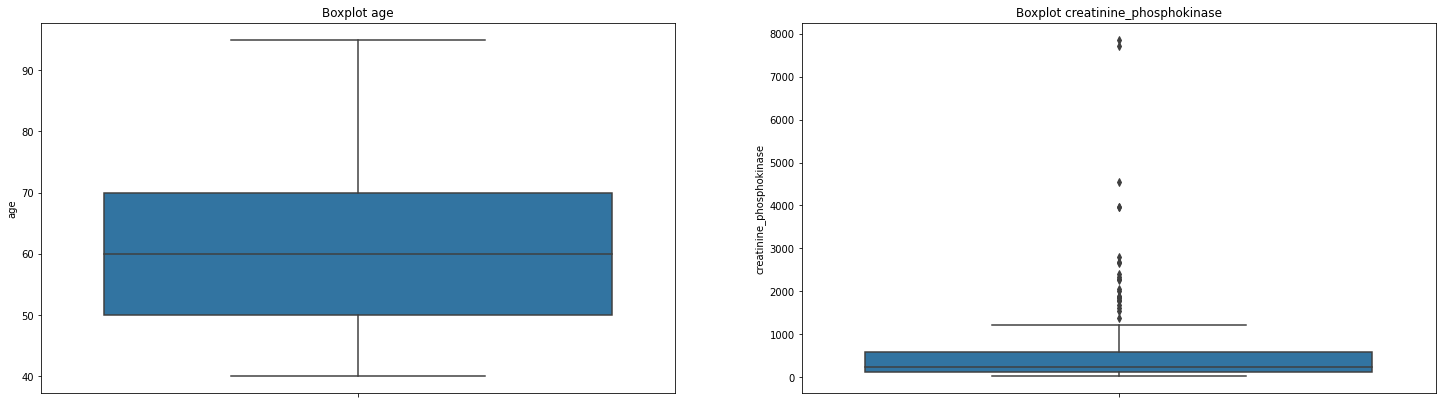

In [114]:
box_out_four('age', 'creatinine_phosphokinase')

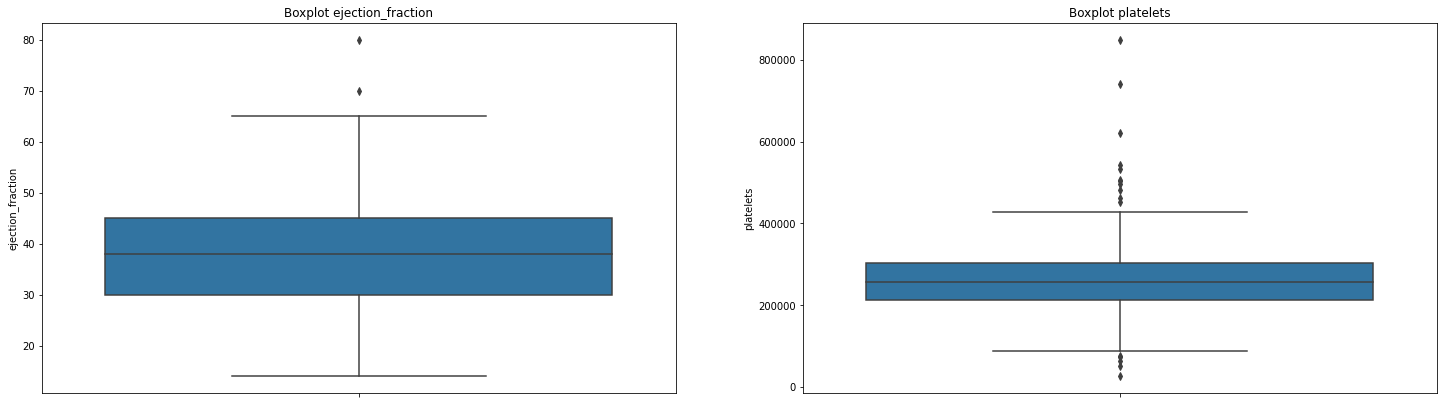

In [115]:
box_out_four('ejection_fraction', 'platelets')

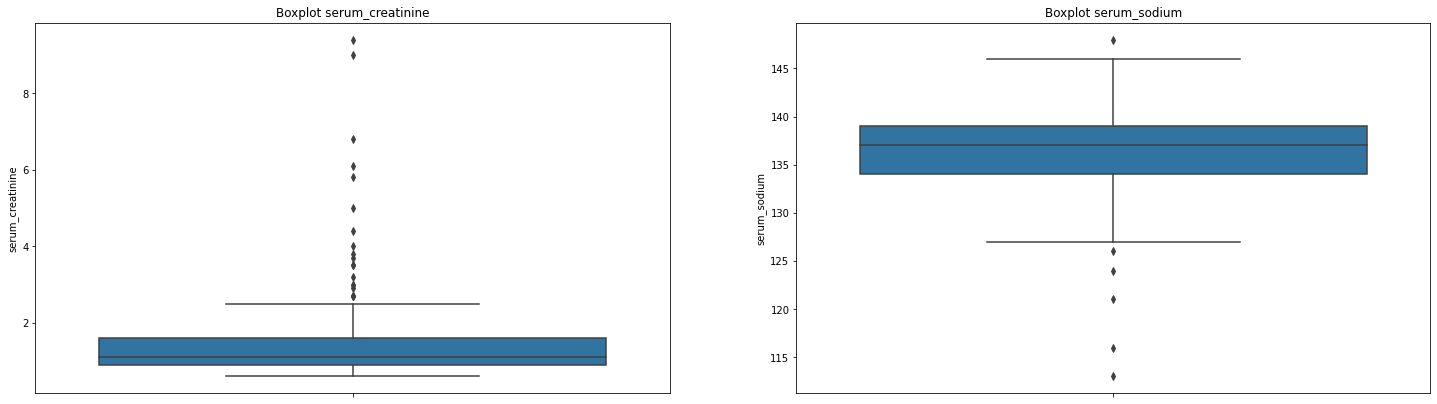

In [116]:
box_out_four('serum_creatinine', 'serum_sodium')

Text(0.5, 1.0, 'Boxplot time')

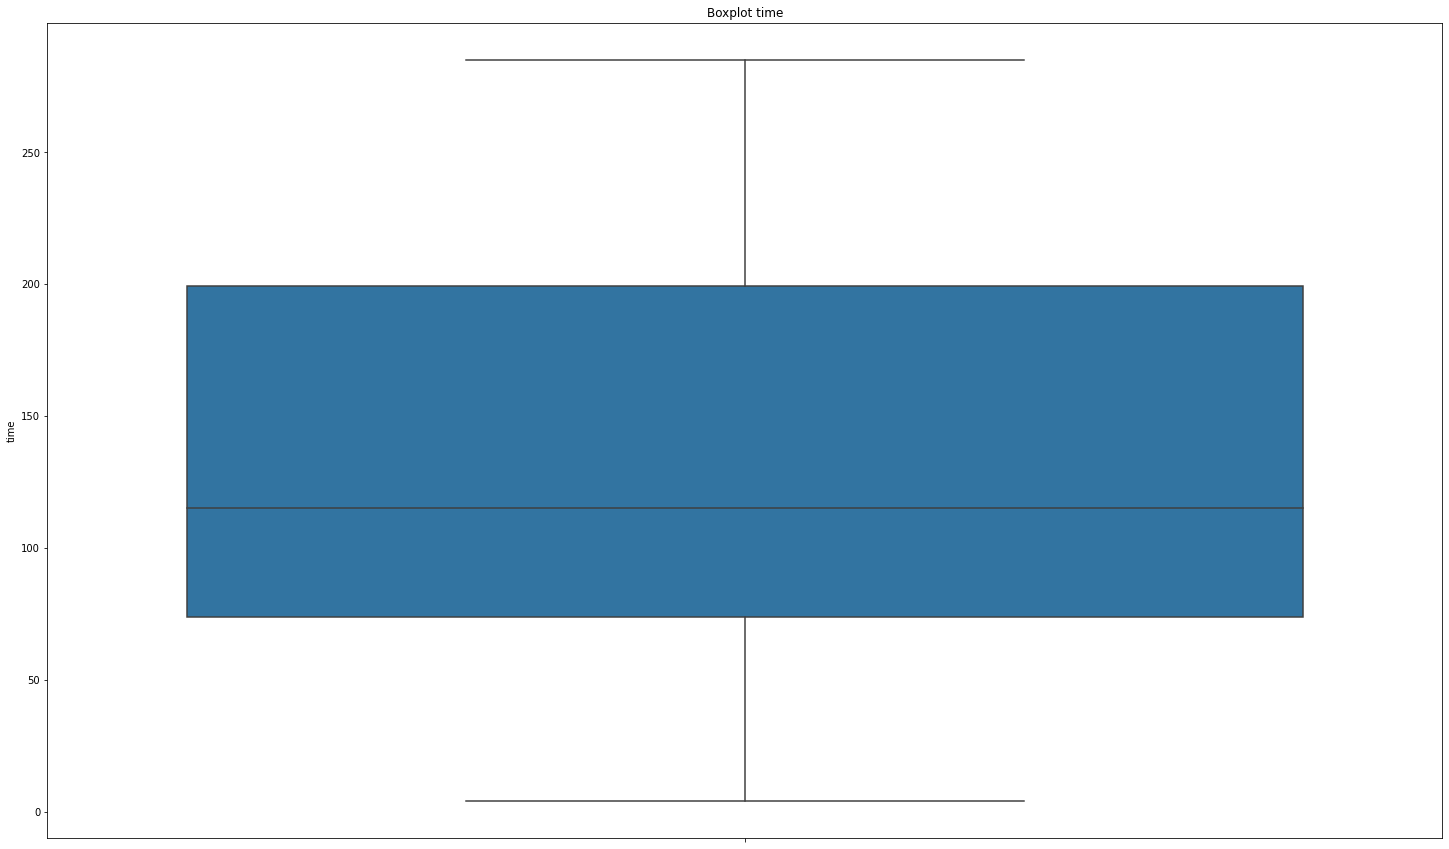

In [117]:
plt.figure(figsize=(25, 15))
sns.boxplot(y=CVD_num['time'])
plt.title(f'Boxplot time')

node : terdapat outlier pada column creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, sehingga dapat di hanling dengan menggunakan winsorizer untuk merubah scala data tanpa merubah karakteristik data

In [120]:
# pipeline numric

numeric_pip = Pipeline([
    ('winsori', Winsorizer(capping_method='iqr', tail='both')),
    ('Scaler' , MinMaxScaler())
])

### pipeline

In [127]:
CVD_categorical = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex']
CVD_numerical= ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


fullpipeline = ColumnTransformer([
    ('num' , numeric_pip, CVD_numerical),
    ('categoris' , categori_pip, CVD_categorical)
])

In [128]:
CVD_prepared = fullpipeline.fit_transform(CVD_drop)

In [129]:
CVD_prepared.shape

(239, 15)

## Modeling

In [232]:
test_set = strat_test_set.copy()
test_label = test_set['DEATH_EVENT'].copy()
test = test_set.drop('DEATH_EVENT', axis=1)

In [137]:
some_data = test.iloc[:10]
some_label = test_label[:10]

In [142]:
some_data_drop = attr_CVD.transform(some_data)
some_data_prepared = fullpipeline.transform(some_data_drop)

### RandomForest

In [130]:
#default
rf = RandomForestClassifier()
rf.fit(CVD_prepared, CVD_label)

RandomForestClassifier()

In [143]:
train_rf_pred = rf.predict(CVD_prepared)
print('accuracy score train rf : ',accuracy_score(CVD_label, train_rf_pred))

accuracy score train rf :  1.0


In [145]:
some_data_rf_pred = rf.predict(some_data_prepared)
print('accuracy score train rf : ',accuracy_score(CVD_label, train_rf_pred))

accuracy score train rf :  1.0


Data Tanpa melewati FE

In [166]:
#Tanpa FE
rf_non = RandomForestClassifier()
rf_non.fit(CVD, CVD_label)

RandomForestClassifier()

In [167]:
Train_rfnon_pred = rf_non.predict(CVD)
print('accuracy score train rf : ',accuracy_score(CVD_label, Train_rfnon_pred ))

accuracy score train rf :  1.0


In [171]:
some_data_rfnon_pred = rf_non.predict(some_data)
print('accuracy score some data : ',accuracy_score(some_label, some_data_rfnon_pred))

accuracy score some data :  0.7


#### CrosVal

In [146]:

def cross_val(model, data, label):
    cross_v = cross_val_score(model, data, label, cv=5, scoring="accuracy")
    
    print('Accurasy - All - Cross Val : ', cross_v)
    print('Accurasy - Mean - Cross Val : ', cross_v.mean())
    print('Accurasy - std - Cross Val : ', cross_v.std())

In [149]:
#Train
print('Train'.upper())
cross_val_rf_train = cross_val(rf,CVD_prepared, CVD_label)

TRAIN
Accurasy - All - Cross Val :  [0.83333333 0.85416667 0.85416667 0.8125     0.89361702]
Accurasy - Mean - Cross Val :  0.8495567375886525
Accurasy - std - Cross Val :  0.026908036484353266


In [170]:
# Tanpa FE
print('Train Tanpa FE'.upper())
cross_val_rf_train = cross_val(rf_non,CVD, CVD_label)

TRAIN TANPA FE
Accurasy - All - Cross Val :  [0.875      0.8125     0.89583333 0.8125     0.89361702]
Accurasy - Mean - Cross Val :  0.8578900709219859
Accurasy - std - Cross Val :  0.037760754477943415


In [173]:
0.8578900709219859 + 0.037760754477943415

0.8956508253999294

note : 
1. dapat dilihat untuk train test didapatkan accuracy 1.0 dan juga some data dengan nilai 1.0 keti dilakukan cross calidation memliki range 0.8226487011042992 - 0.8764647740730057, sehingga untuk model RandomForest Default mengalami overfitting.
2. untuk data tanpa melwati FE memiliki accuracy score dengan nilai 1.0, nilai unutk some data dengan nilai 0.7, dan untuk nilai cross validation dengan range 0.8201293164440424 - 0.8956508253999294, sehingga unutk model Random Forest Default data tanpa FE mengalami overfit
3. sehingga dapat di sumpulkan bahwa data yang melawati FE lebih baik dapr pada data tanpa melawati FE

### Boosting

In [153]:
adaBust = AdaBoostClassifier()
adaBust.fit(CVD_prepared, CVD_label)

AdaBoostClassifier()

In [154]:
#Train
train_ada_pred = adaBust.predict(CVD_prepared)
print('accuracy score train adaBust : ',accuracy_score(CVD_label, train_ada_pred))

accuracy score train adaBust :  0.9665271966527197


In [155]:
#Some
some_ada_pred = adaBust.predict(some_data_prepared)
print('accuracy score train adaBust : ',accuracy_score(some_label, some_ada_pred))

accuracy score train adaBust :  0.7


Data tanpa FE

In [174]:
adaBust_non = AdaBoostClassifier()
adaBust_non.fit(CVD, CVD_label)

AdaBoostClassifier()

In [180]:
adaBust_Train_non = adaBust_non.predict(CVD)
print('accuracy score data tampam FE : ', accuracy_score(CVD_label, adaBust_Train_non))

accuracy score data tampam FE :  0.9665271966527197


In [182]:
#Some
some_adanon_pred = adaBust_non.predict(some_data)
print('accuracy score train adaBust non FE: ',accuracy_score(some_label, some_adanon_pred))

accuracy score train adaBust non FE:  0.8


#### crosval

In [183]:
#Train
print('Train'.upper())
cross_val_rf_train = cross_val(adaBust,CVD_prepared, CVD_label)

TRAIN
Accurasy - All - Cross Val :  [0.83333333 0.79166667 0.83333333 0.72916667 0.82978723]
Accurasy - Mean - Cross Val :  0.8034574468085106
Accurasy - std - Cross Val :  0.04033989934919329


In [184]:
# Tanpa FE
print('Train Tanpa FE'.upper())
cross_val_rf_train = cross_val(adaBust_non,CVD, CVD_label)

TRAIN TANPA FE
Accurasy - All - Cross Val :  [0.8125     0.75       0.83333333 0.72916667 0.82978723]
Accurasy - Mean - Cross Val :  0.7909574468085105
Accurasy - std - Cross Val :  0.043042218095780085


Node : 
1. adaBust data yang melawati FE lebih baik

## Fine Tunnig

### Random Forest

In [185]:
rf = RandomForestClassifier(random_state=1)
params = {
    'n_estimators' : [3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'max_depth' : [int(x) for x in np.linspace(1, 6,3)],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [4,6,8],
    'criterion' : ['entropy' , 'gini']
}
params

{'n_estimators': [3, 5, 7],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [1, 3, 6],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [4, 6, 8],
 'criterion': ['entropy', 'gini']}

In [187]:
rf_random_gread = RandomizedSearchCV(estimator=rf, param_distributions=params, n_jobs=-1, cv=5)
rf_random_gread.fit(CVD_prepared, CVD_label)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 3, 6],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [3, 5, 7]})

In [188]:
rf_random_gread.best_params_

{'n_estimators': 5,
 'min_samples_split': 2,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 6,
 'criterion': 'gini'}

In [189]:
rf_best_random = rf_random_gread.best_estimator_

In [190]:
rf_best_random_pred = rf_best_random.predict(CVD_prepared)
print('classification report : \n', classification_report(CVD_label, rf_best_random_pred))

classification report : 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       162
           1       0.85      0.75      0.80        77

    accuracy                           0.88       239
   macro avg       0.87      0.85      0.86       239
weighted avg       0.88      0.88      0.88       239



In [191]:
#GridsearchCV
rf_grid = RandomForestClassifier(random_state=0)
param_grid = {
    'n_estimators' : [rf_random_gread.best_params_['n_estimators']-2,
                     rf_random_gread.best_params_['n_estimators']+2],
    
    'min_samples_split' : [rf_random_gread.best_params_['min_samples_split']],
    
    'max_features' : [rf_random_gread.best_params_['max_features']],
    
    'min_samples_leaf' : [rf_random_gread.best_params_['min_samples_leaf'],
                          rf_random_gread.best_params_['min_samples_leaf']-1,
                          rf_random_gread.best_params_['min_samples_leaf']+1,
                          rf_random_gread.best_params_['min_samples_leaf']+2],
    
    'max_depth' : [rf_random_gread.best_params_['max_depth']+10,
                rf_random_gread.best_params_['max_depth']+15],
    
    'criterion' : [rf_random_gread.best_params_['criterion']]
}
param_grid

{'n_estimators': [3, 7],
 'min_samples_split': [2],
 'max_features': ['sqrt'],
 'min_samples_leaf': [6, 5, 7, 8],
 'max_depth': [16, 21],
 'criterion': ['gini']}

In [192]:
rf_GridCV = RandomForestClassifier(random_state=7)
grit_search_rf = GridSearchCV(estimator=rf_GridCV, param_grid = param_grid, n_jobs = -1, cv=5)
grit_search_rf.fit(CVD_prepared, CVD_label)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=7), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [16, 21],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [6, 5, 7, 8],
                         'min_samples_split': [2], 'n_estimators': [3, 7]})

In [193]:
grit_search_rf.best_params_

{'criterion': 'gini',
 'max_depth': 16,
 'max_features': 'sqrt',
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 7}

In [194]:
gridDV_best_rf = grit_search_rf.best_estimator_
gridCV_best_rf_pred = gridDV_best_rf.predict(CVD_prepared)

In [195]:

print('classification report : \n', classification_report(CVD_label, gridCV_best_rf_pred))

classification report : 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       162
           1       0.88      0.74      0.80        77

    accuracy                           0.88       239
   macro avg       0.88      0.85      0.86       239
weighted avg       0.88      0.88      0.88       239



### adaBost

In [210]:
ada_clf = AdaBoostClassifier(random_state=42)
params = {
    'n_estimators' : [3, 5, 7],
    'learning_rate' : [X for X in np.linspace(1.0,3.0,6)],
    'algorithm' : ['SAMME', 'SAMME.R']
    }
params

{'n_estimators': [3, 5, 7],
 'learning_rate': [1.0, 1.4, 1.8, 2.2, 2.6, 3.0],
 'algorithm': ['SAMME', 'SAMME.R']}

In [213]:
ada_random_grid = RandomizedSearchCV(estimator=ada_clf, param_distributions=params, 
                                     n_jobs=-1, cv=5)
ada_random_grid.fit(CVD_prepared, CVD_label)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [1.0, 1.4, 1.8, 2.2,
                                                          2.6, 3.0],
                                        'n_estimators': [3, 5, 7]})

In [215]:
ada_random_grid.best_params_

{'n_estimators': 3, 'learning_rate': 1.0, 'algorithm': 'SAMME.R'}

In [218]:
ada_random_best = ada_random_grid.best_estimator_
ada_random_pred = ada_random_best.predict(CVD_prepared)
print('classification report : \n', classification_report(CVD_label, ada_random_pred))

classification report : 
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       162
           1       0.82      0.75      0.78        77

    accuracy                           0.87       239
   macro avg       0.85      0.84      0.84       239
weighted avg       0.86      0.87      0.86       239



In [221]:
ada_clf_grid = AdaBoostClassifier(random_state=21)
params_grid = {
    'n_estimators' : [ada_random_grid.best_params_['n_estimators'],
                      ada_random_grid.best_params_['n_estimators']-1,
                       ada_random_grid.best_params_['n_estimators']+1,
                        ada_random_grid.best_params_['n_estimators']+2],
    
    'learning_rate' : [ada_random_grid.best_params_['learning_rate'],
                       ada_random_grid.best_params_['learning_rate']-0.5,
                       ada_random_grid.best_params_['learning_rate']+0.5],
    
    'algorithm' : [ada_random_grid.best_params_['algorithm']]
    }
params_grid

{'n_estimators': [3, 2, 4, 5],
 'learning_rate': [1.0, 0.5, 1.5],
 'algorithm': ['SAMME.R']}

In [223]:
gridSRC_boos = GridSearchCV(estimator= ada_clf_grid, param_grid = params_grid, n_jobs=-1, cv=5)
gridSRC_boos.fit(CVD_prepared, CVD_label)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=21), n_jobs=-1,
             param_grid={'algorithm': ['SAMME.R'],
                         'learning_rate': [1.0, 0.5, 1.5],
                         'n_estimators': [3, 2, 4, 5]})

In [224]:
gridSRC_boos.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 4}

In [226]:
gridSRC_best = gridSRC_boos.best_estimator_
gridSRC_boos_pred = gridSRC_best.predict(CVD_prepared)

In [227]:
print('classification report : \n', classification_report(CVD_label, gridSRC_boos_pred))

classification report : 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       162
           1       0.82      0.71      0.76        77

    accuracy                           0.86       239
   macro avg       0.85      0.82      0.83       239
weighted avg       0.86      0.86      0.85       239



### Test

In [234]:
test_drp = attr_CVD.transform(test)
test_prepared = fullpipeline.transform(test_drp)

karna asumsi saya 1 itu meninggal dan 0 itu hidup maka, dengan 1 memiliki nilai negatif dan 0 memiliki nilai positif, sehingga saya ingin meminimalisir meninggal di predeksi hidup sehingga menurunkan False Positif dengan melihat precision ,dapat dilihat precision tertinggi

pada RF Random Cv, param: {'n_estimators': 5,
 'min_samples_split': 2,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 6,
 'criterion': 'gini'}

In [235]:
test_rf_random = rf_best_random.predict(test_prepared)

In [236]:

print('classification report : \n', classification_report(test_label, test_rf_random))

classification report : 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88        41
           1       0.76      0.68      0.72        19

    accuracy                           0.83        60
   macro avg       0.81      0.79      0.80        60
weighted avg       0.83      0.83      0.83        60



In [237]:
test_random_pred = ada_random_best.predict(test_prepared)
print('classification report : \n', classification_report(test_label, test_random_pred))

classification report : 
               precision    recall  f1-score   support

           0       0.89      0.83      0.86        41
           1       0.68      0.79      0.73        19

    accuracy                           0.82        60
   macro avg       0.79      0.81      0.80        60
weighted avg       0.83      0.82      0.82        60



In [238]:
test_gridSRC_boos_pred = gridSRC_best.predict(test_prepared)
print('classification report : \n', classification_report(test_label, test_gridSRC_boos_pred))

classification report : 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.78      0.74      0.76        19

    accuracy                           0.85        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.85      0.85      0.85        60



jadi dapat dilihat paling tinggi precision dengan 0 positif paling tinggi yaitu pada adaBoost dengan 
1. parameter : {'n_estimators': 3, 'learning_rate': 1.0, 'algorithm': 'SAMME.R'} 
2. dengan nilai test 0.88